In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
courant = 0.3
X, dx = np.linspace(0, 1, 40, retstep=True)
dt = courant * dx

In [3]:
def initial_u(x):
    return np.exp(-np.power(((x - 0.5) / 0.08), 2) / 2)

In [4]:
def u(X, t):
    uvals = []
    if t == 0: 
        uvals = initial_u(X)
    else:
        for j in range(len(X)):
            if j == 0: 
                uvals.append(U[t-1][j] + dt / (2 * dx) * (U[t-1][j+1] - U[t-1][ -1]))
            elif j == len(X) - 1: 
                uvals.append(U[t-1][j] + dt / (2 * dx) * (U[t-1][ 0 ] - U[t-1][j-1]))
            else:
                uvals.append(U[t-1][j] + dt / (2 * dx) * (U[t-1][j+1] - U[t-1][j-1]))   
    return uvals

In [5]:
U = []
for t in range(int(20 / courant)):
    U.append(u(X, t))

<IPython.core.display.Javascript object>


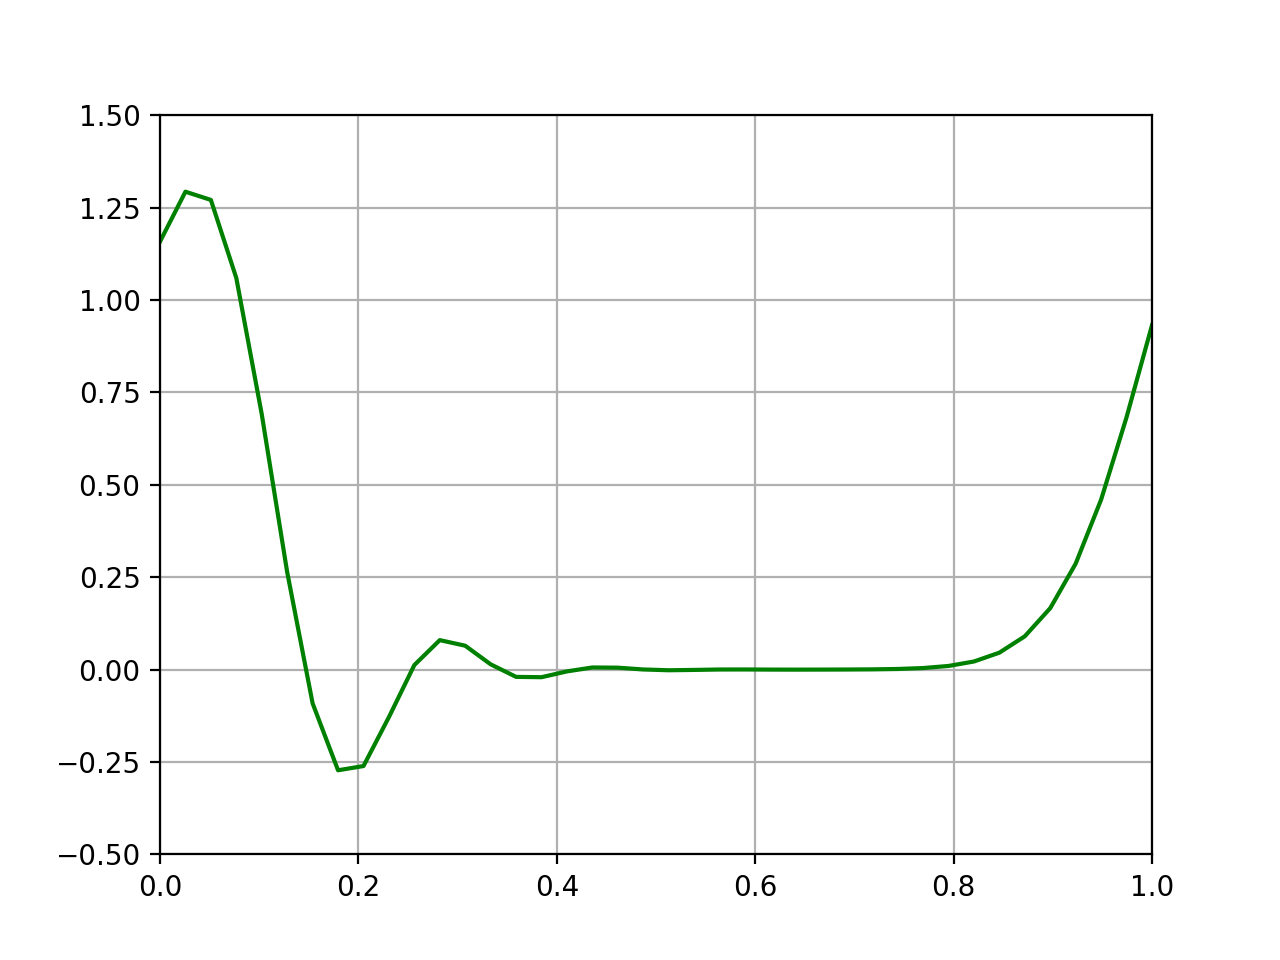

In [6]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

k = 0
def animate(i):
    global k
    u = U[k]
    k += 1
    ax.clear()
    plt.plot(X, u, color='green')
    plt.grid()
    plt.ylim([-0.5, 1.5])
    plt.xlim([0, 1])

anim = animation.FuncAnimation(fig, animate, interval=20)
plt.show()